#   Question 2

#    Support Vector Machine Forestfires data

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [183]:
forest_data = pd.read_csv("forestfires.csv")
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


###    Analysing the dataset 

In [184]:
forest_data[forest_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [185]:
forest_fire = forest_data.drop_duplicates().reset_index(drop=True)
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [186]:
label_encoder = preprocessing.LabelEncoder()
forest_fire["month"] = label_encoder.fit_transform(forest_fire["month"])
forest_fire["day"] = label_encoder.fit_transform(forest_fire["day"])
forest_fire["size_category"] = label_encoder.fit_transform(forest_fire["size_category"])

In [187]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


###  Splitting the dataset

In [188]:
x = forest_fire.iloc[:,0:10]

In [189]:
y = forest_fire.iloc[:,30]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state =0)

###   Standardizing the dataset 

In [191]:
X_train_std = StandardScaler().fit_transform(X_train)
X_train_std

array([[-0.16640808, -0.39759636, -0.16169614, ...,  0.6191831 ,
         0.77596864, -0.07679066],
       [ 1.20597672, -0.39759636,  0.30150948, ..., -1.04346813,
         0.00755463, -0.07679066],
       [ 1.20597672, -0.92574674,  0.02779707, ...,  1.45050872,
        -0.4864258 , -0.07679066],
       ...,
       [-1.08133128,  0.65870441,  0.46994789, ..., -0.46793501,
        -0.4864258 , -0.07679066],
       [-0.16640808, -0.92574674,  0.7226055 , ..., -0.46793501,
        -0.4864258 , -0.07679066],
       [-1.08133128, -0.39759636, -0.11958654, ...,  0.6191831 ,
        -1.19995309, -0.07679066]])

In [192]:
X_test_std = StandardScaler().fit_transform(X_test)
X_test_std

array([[ 2.27525535e-01, -1.36064491e+00,  2.02710232e-01, ...,
        -1.26696351e+00,  7.62827007e-01, -8.11107106e-02],
       [ 1.14361519e+00, -8.56580332e-01, -2.36510704e-01, ...,
         5.40452966e-01,  7.62827007e-01, -8.11107106e-02],
       [-1.49687852e-03,  1.66374257e+00,  1.31868145e-01, ...,
        -1.93809978e-01,  4.76064029e-01, -8.11107106e-02],
       ...,
       [ 1.14361519e+00, -8.56580332e-01,  2.59383901e-01, ...,
         4.27489436e-01, -5.56282692e-01, -8.11107106e-02],
       [-1.14660895e+00, -3.52515752e-01,  5.56920664e-01, ...,
        -3.06773507e-01, -1.07245605e+00, -8.11107106e-02],
       [-1.14660895e+00,  1.51548828e-01,  2.87720736e-01, ...,
        -9.84554686e-01,  7.62827007e-01, -8.11107106e-02]])

###  Visualizing the dataset

Text(0, 0.5, 'FFMC')

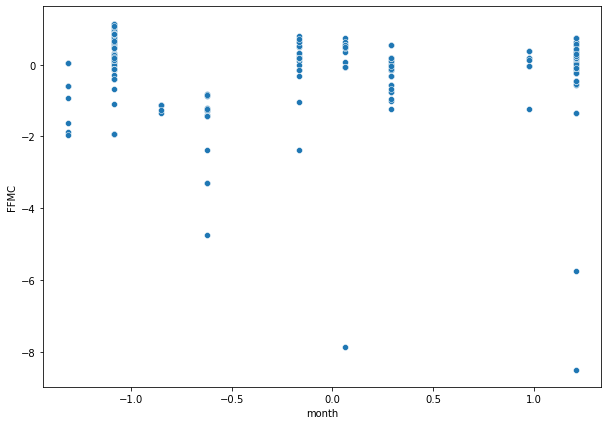

In [196]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train_std[:,0], y=X_train_std[:,2])
plt.xlabel("month")
plt.ylabel("FFMC")

Text(0, 0.5, 'DMC')

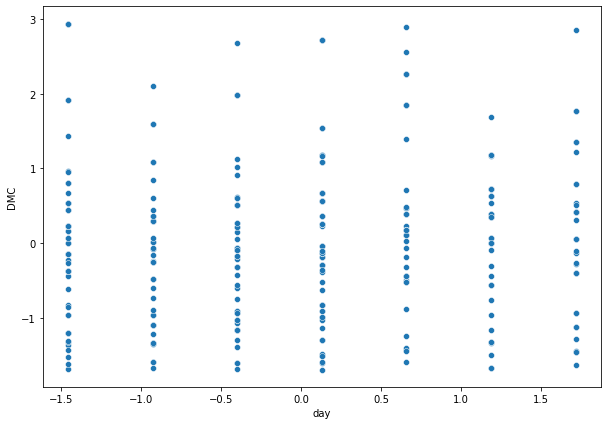

In [197]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train_std[:,1], y=X_train_std[:,3])
plt.xlabel("day")
plt.ylabel("DMC")

Text(0, 0.5, 'temp')

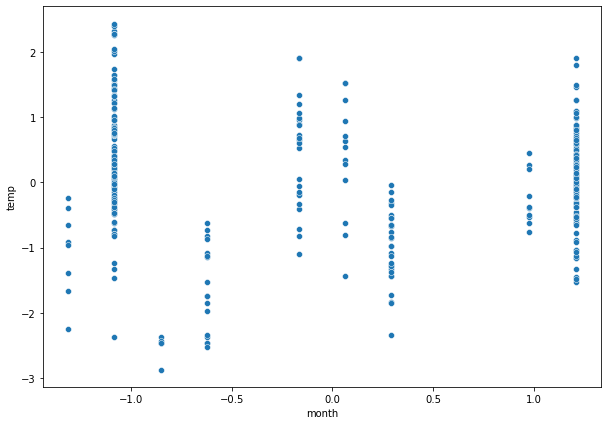

In [198]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train_std[:,0], y=X_train_std[:,6])
plt.xlabel("month")
plt.ylabel("temp")

###   Model for linear kernal 

In [199]:
classifier_linear = SVC(kernel= "linear") 
classifier_linear.fit(X_train_std, y_train)
y_pred_linear = classifier_linear.predict(X_test_std)

In [200]:
cr_linear = print(classification_report(y_test,y_pred_linear))
cr_linear

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.76      0.99      0.86       116

    accuracy                           0.75       153
   macro avg       0.38      0.50      0.43       153
weighted avg       0.57      0.75      0.65       153



In [201]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_linear

array([[  0,  37],
       [  1, 115]], dtype=int64)

In [202]:
support_vectors_linear = classifier_linear.support_vectors_
support_vectors_linear

array([[-0.62386968,  0.13055403, -1.44603899, ...,  1.57840496,
        -0.98040623, -0.07679066],
       [-1.08133128,  0.13055403, -1.93029941, ...,  1.77024934,
         0.9955155 , -0.07679066],
       [ 1.20597672, -0.39759636,  0.36467388, ...,  0.17154623,
        -1.19995309, -0.07679066],
       ...,
       [-1.08133128,  0.13055403,  0.21729028, ..., -0.34003876,
         1.26994907, -0.07679066],
       [ 1.20597672, -0.39759636,  0.30150948, ..., -0.72372751,
        -0.98040623, -0.07679066],
       [-1.08133128, -0.39759636, -0.11958654, ...,  0.6191831 ,
        -1.19995309, -0.07679066]])

###   Visualizing the linear kernel SVM

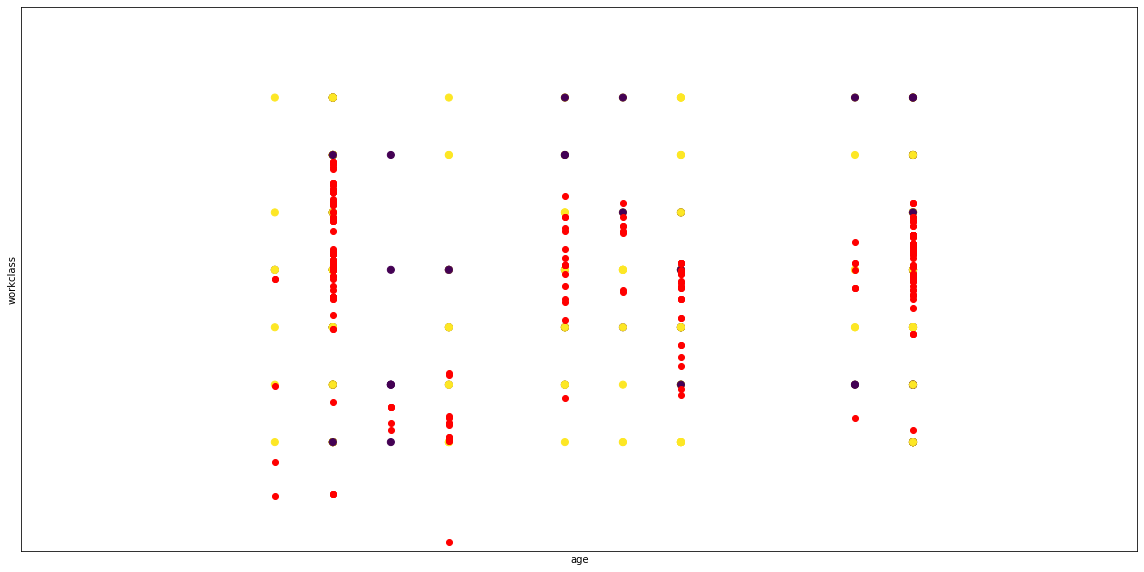

In [203]:
plt.figure(figsize=(20,10))
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
plt.scatter(X_train_std[:, 0],X_train_std[:, 1], s=50,c=y_train, cmap="viridis")
plt.scatter(support_vectors_linear[:,0], support_vectors_linear[:,2], color='red')
plt.xlabel('age')
plt.ylabel('workclass')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

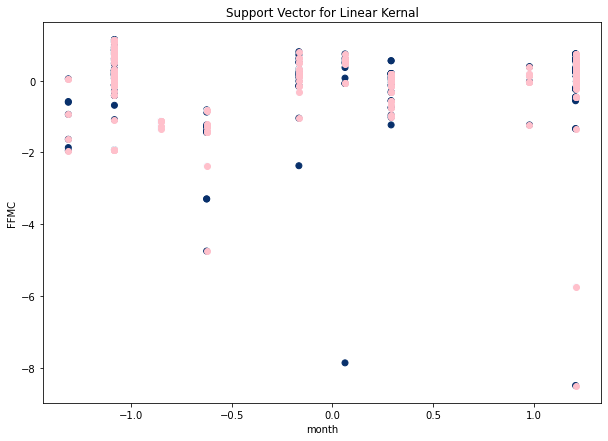

In [204]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_std[:,0], X_train_std[:,2], c=y_train, cmap='Blues')
plt.scatter(support_vectors_linear[:,0], support_vectors_linear[:,2], color='pink')
plt.title('Support Vector for Linear Kernal')
plt.xlabel('month')
plt.ylabel('FFMC')
plt.show()

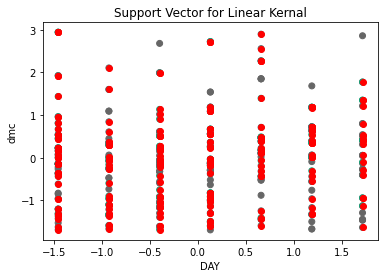

In [205]:
plt.scatter(X_train_std[:,1], X_train_std[:,3], c=y_train, cmap="Dark2")
plt.scatter(support_vectors_linear[:,1], support_vectors_linear[:,3], color='red')
plt.title('Support Vector for Linear Kernal')
plt.xlabel('DAY')
plt.ylabel('dmc')
plt.show()

###   Model for polynomial kernel

In [206]:
classifier_poly = SVC(kernel= "poly") 
classifier_poly.fit(X_train_std, y_train)
y_pred_poly = classifier_poly.predict(X_test_std)

In [207]:
cr_poly = print(classification_report(y_test,y_pred_poly))
cr_poly

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        37
           1       0.76      0.99      0.86       116

    accuracy                           0.76       153
   macro avg       0.63      0.51      0.46       153
weighted avg       0.70      0.76      0.67       153



In [208]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_poly

array([[  1,  36],
       [  1, 115]], dtype=int64)

In [209]:
support_vectors_poly = classifier_poly.support_vectors_
support_vectors_poly

array([[-0.62386968,  0.13055403, -1.44603899, ...,  1.57840496,
        -0.98040623, -0.07679066],
       [-1.08133128,  0.13055403, -1.93029941, ...,  1.77024934,
         0.9955155 , -0.07679066],
       [ 1.20597672, -0.39759636,  0.36467388, ...,  0.17154623,
        -1.19995309, -0.07679066],
       ...,
       [ 1.20597672, -0.39759636,  0.36467388, ..., -0.21214251,
         0.00755463, -0.07679066],
       [ 1.20597672, -0.39759636,  0.30150948, ..., -0.72372751,
        -0.98040623, -0.07679066],
       [-0.16640808, -0.92574674,  0.7226055 , ..., -0.46793501,
        -0.4864258 , -0.07679066]])

###   Visualizing the polynomial kernel SVM

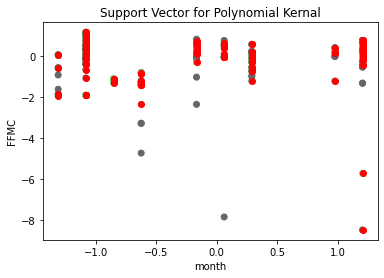

In [210]:
plt.scatter(X_train_std[:,0], X_train_std[:,2], c=y_train, cmap="Accent")
plt.scatter(support_vectors_poly[:,0], support_vectors_poly[:,2], color='red')
plt.title('Support Vector for Polynomial Kernal')
plt.xlabel('month')
plt.ylabel('FFMC')
plt.show()

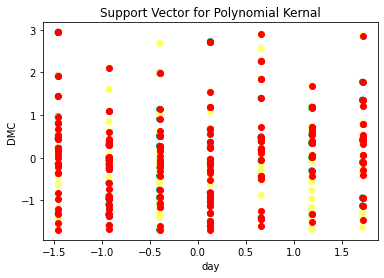

In [211]:
plt.scatter(X_train_std[:,1], X_train_std[:,3], c=y_train, cmap="summer")
plt.scatter(support_vectors_poly[:,1], support_vectors_poly[:,3], color='red')
plt.title('Support Vector for Polynomial Kernal')
plt.xlabel('day')
plt.ylabel('DMC')
plt.show()

###   Model for radial bias funtion kernel 

In [212]:
classifier_rbf = SVC(kernel= "rbf") 
classifier_rbf.fit(X_train_std, y_train)
y_pred_rbf = classifier_rbf.predict(X_test_std)

In [213]:
cr_rbf = print(classification_report(y_test,y_pred_rbf))
cr_rbf

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.76      1.00      0.87       116

    accuracy                           0.76       153
   macro avg       0.88      0.51      0.46       153
weighted avg       0.82      0.76      0.67       153



In [214]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_rbf

array([[  1,  36],
       [  0, 116]], dtype=int64)

In [215]:
support_vectors_rbf = classifier_rbf.support_vectors_
support_vectors_rbf

array([[-0.62386968,  0.13055403, -1.44603899, ...,  1.57840496,
        -0.98040623, -0.07679066],
       [-1.08133128,  0.13055403, -1.93029941, ...,  1.77024934,
         0.9955155 , -0.07679066],
       [ 1.20597672, -0.39759636,  0.36467388, ...,  0.17154623,
        -1.19995309, -0.07679066],
       ...,
       [ 0.06232272,  0.13055403,  0.49100269, ...,  0.29944248,
        -1.47438666, -0.07679066],
       [ 1.20597672,  1.18685479,  0.23834508, ...,  0.6191831 ,
        -0.98040623, -0.07679066],
       [-0.16640808, -0.92574674,  0.7226055 , ..., -0.46793501,
        -0.4864258 , -0.07679066]])

###   Visualizing the raidal bias function kernel SVM

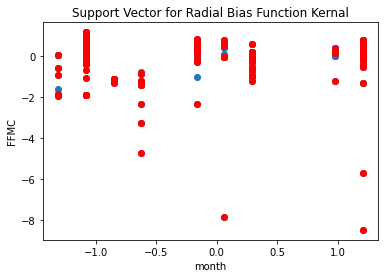

In [216]:
plt.scatter(X_train_std[:,0], X_train_std[:,2])
plt.scatter(support_vectors_rbf[:,0], support_vectors_rbf[:,2], color='red')
plt.title('Support Vector for Radial Bias Function Kernal')
plt.xlabel('month')
plt.ylabel('FFMC')
plt.show()

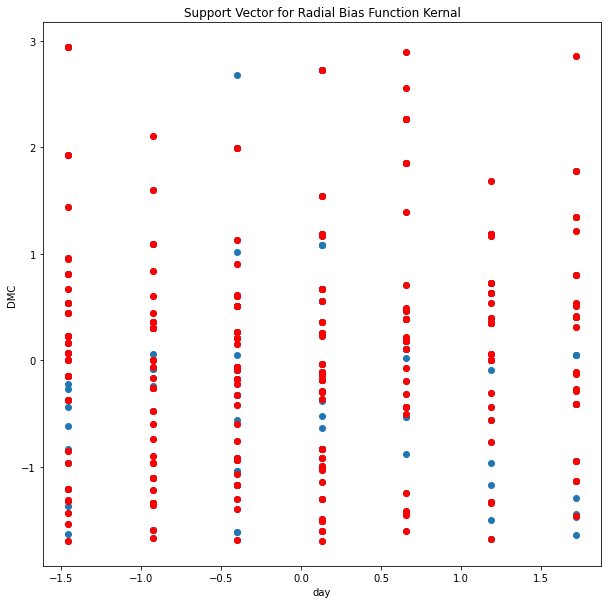

In [217]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_std[:,1], X_train_std[:,3])
plt.scatter(support_vectors_rbf[:,1], support_vectors_rbf[:,3], color='red')
plt.title('Support Vector for Radial Bias Function Kernal')
plt.xlabel('day')
plt.ylabel('DMC')
plt.show()

###  While comparing the cofusion matrix, accuracy, F1 score, precision and recall radian bias function is better classifier comapred to other two classifiers 